## 1. 首先回测的是可以在夜盘开仓的策略，即用夜盘信号，在夜盘开仓  
#### 塑料没有夜盘

In [1]:
symlist = ["L.DCE","AU.SHF","CF.CZC", "CU.SHF", "J.DCE",
           "P.DCE", "RB.SHF","RU.SHF",
           "SR.CZC","M.DCE"]
%matplotlib inline

In [2]:
"""加载nightopen"""
from bog_nightopen_test import *
from perforanalyze import *

all_pf = pd.DataFrame()
for sym in symlist:
    Accountsummny = runstrategy('../../ts_data/day/'+sym+'.DAY.csv',0.1,0.1,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = symlist

In [3]:
all_pf

,L.DCE,AU.SHF,CF.CZC,CU.SHF,J.DCE,P.DCE,RB.SHF,RU.SHF,SR.CZC,M.DCE
0,,,,,,,,,,
开始时间,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31
结束时间,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28
回测周期,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
年化收益率,-4.8203%,0.9884%,0.8520%,1.1713%,0.2739%,6.2863%,2.8151%,-6.3059%,-1.9106%,2.7773%
平均每年收益,-4.41%,1.08%,0.93%,1.30%,0.42%,6.21%,2.88%,-6.22%,-1.82%,2.99%
年化波动率,10.29%,4.36%,3.98%,5.25%,5.38%,4.69%,4.65%,7.62%,4.64%,7.14%
夏普率,-0.428828649861,0.247328976144,0.232852992549,0.247800923895,0.0776769319003,1.32454386072,0.61999873917,-0.816540809174,-0.392681942034,0.419366642602
最大回撤,30.37%,7.88%,5.00%,6.38%,11.55%,5.08%,5.92%,30.30%,13.19%,12.96%
最大回撤周期,506,619,760,595,616,350,399,1141,1061,499


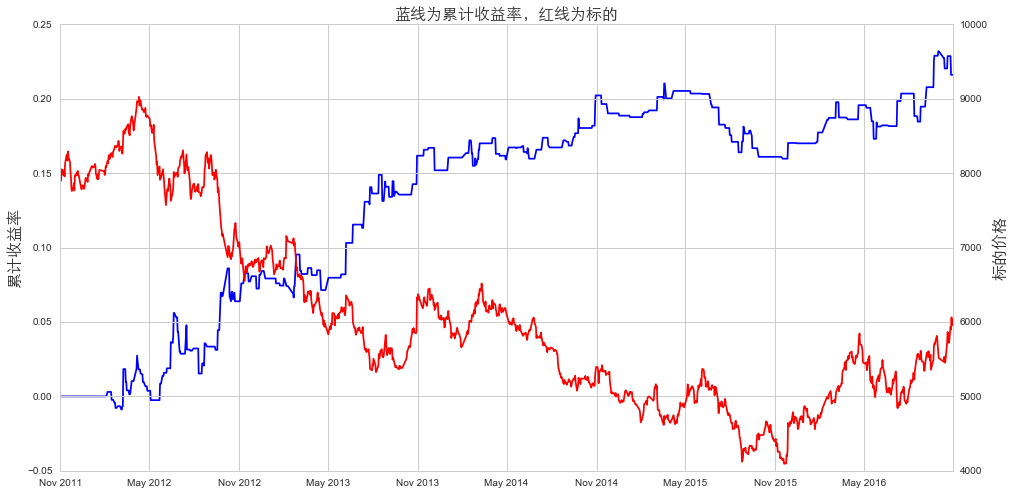

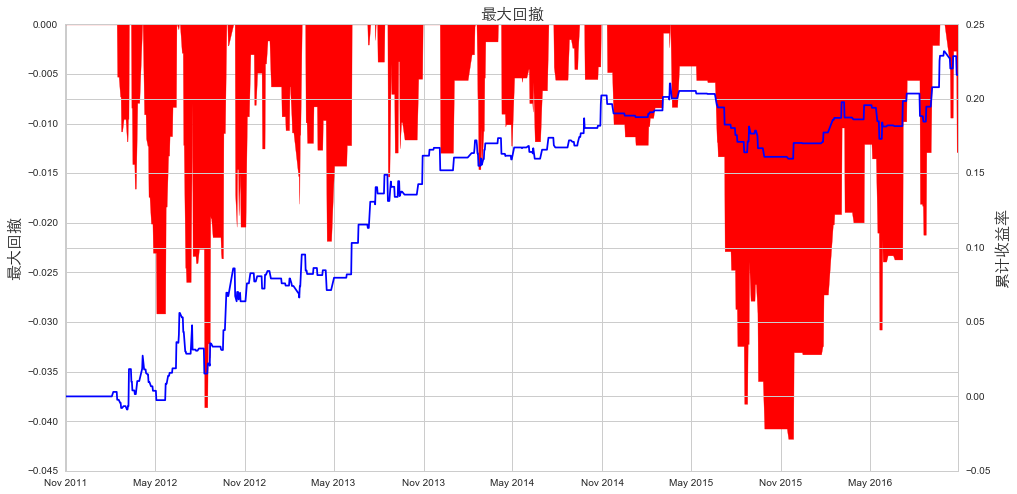

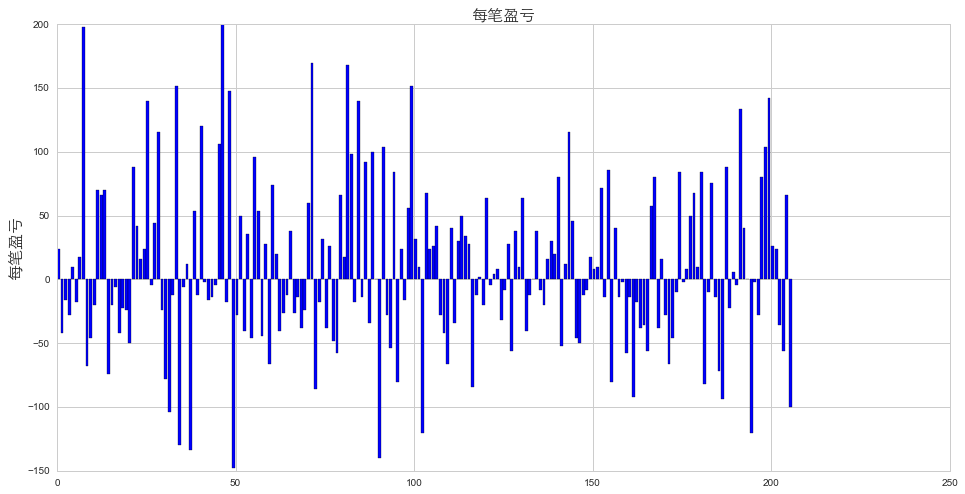

In [9]:
Accountsummny = runstrategy('../../ts_data/day/P.DCE.DAY.csv',0.04,0.36,60)
pf,Pnl = stratanalyz(Accountsummny)
ploter(Accountsummny)

In [7]:
all_pf = pd.DataFrame()
for i in 0.01*np.arange(1,100):
    Accountsummny = runstrategy('../../ts_data/day/P.DCE.DAY.csv',0.36,i,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = 0.01*np.arange(1,100)

In [8]:
"""打印最优的5个参数"""
all_pf.T.sort(columns=u'年化收益率',ascending=0).head(5)

/Users/zhaoyong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,开始时间,结束时间,回测周期,年化收益率,平均每年收益,年化波动率,夏普率,最大回撤,最大回撤周期,Calmar比率,交易次数,盈亏比,胜率
0.04,2011/10/31,2016/10/28,1214,8.8282%,8.55%,4.33%,1.97600718879,4.27%,196,2.06846063023,199,2.27145581691,55.78%
0.05,2011/10/31,2016/10/28,1214,8.7070%,8.44%,4.33%,1.94986913917,4.27%,206,2.04005311475,194,2.26073030109,55.15%
0.06,2011/10/31,2016/10/28,1214,8.6576%,8.40%,4.33%,1.93857615701,4.27%,206,2.02847793115,193,2.25240230621,54.92%
0.08,2011/10/31,2016/10/28,1214,8.5280%,8.27%,4.21%,1.96524369664,3.02%,238,2.82068571509,185,2.30591434398,55.14%
0.09,2011/10/31,2016/10/28,1214,8.5280%,8.27%,4.21%,1.96524369664,3.02%,238,2.82068571509,185,2.30591434398,55.14%


## 2. 回测的是用夜盘的信号，等到早上再去下单

In [4]:
"""加载dayopen"""
from bog_dayopen_test import *
from perforanalyze import *

all_pf = pd.DataFrame()
for sym in symlist[1:]:
    Accountsummny = runstrategy('../../ts_data/day/'+sym+'.addopen.csv',0.1,0.1,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = symlist[1:]

In [5]:
all_pf

,AU.SHF,CF.CZC,CU.SHF,J.DCE,P.DCE,RB.SHF,RU.SHF,SR.CZC,M.DCE
0,,,,,,,,,
开始时间,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31
结束时间,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28
回测周期,1214,1214,1214,1214,1214,1214,1214,1214,1214
年化收益率,-1.7632%,-2.1127%,-2.5212%,0.1057%,-7.3137%,-2.7429%,6.5170%,1.1845%,-5.2113%
平均每年收益,-1.71%,-2.07%,-2.43%,0.27%,-7.37%,-2.66%,6.49%,1.26%,-4.91%
年化波动率,3.77%,3.70%,4.91%,5.81%,6.75%,5.00%,5.96%,4.01%,9.42%
夏普率,-0.453216029855,-0.558570195651,-0.494976773343,0.0472804702817,-1.09127153739,-0.531155458314,1.0890303366,0.314007232447,-0.520838172567
最大回撤,12.77%,10.12%,14.85%,15.48%,35.92%,16.53%,5.29%,6.52%,27.78%
最大回撤周期,1142,1151,1081,1079,1133,1146,151,633,1151


## 3. 用早盘的信号，早上去下单，即直接跳过夜盘

In [6]:
"""加载daytest"""
from bog_daytest import *
from perforanalyze import *
all_pf = pd.DataFrame()
for sym in symlist[1:]:
    Accountsummny = runstrategy('../../ts_data/day/'+sym+'.addopen.csv',0.1,0.1,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = symlist[1:]

In [7]:
all_pf

,AU.SHF,CF.CZC,CU.SHF,J.DCE,P.DCE,RB.SHF,RU.SHF,SR.CZC,M.DCE
0,,,,,,,,,
开始时间,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31
结束时间,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28
回测周期,1214,1214,1214,1214,1214,1214,1214,1214,1214
年化收益率,-4.1765%,-2.4203%,0.2024%,-1.8032%,-9.0645%,-1.0583%,7.5451%,-1.2048%,-6.7318%
平均每年收益,-4.19%,-2.35%,0.34%,-1.60%,-9.20%,-0.91%,7.47%,-1.09%,-6.47%
年化波动率,3.86%,4.55%,5.21%,6.60%,7.80%,5.48%,6.18%,4.99%,10.01%
夏普率,-1.08556931637,-0.515814486874,0.0648772866317,-0.242811231447,-1.17964272122,-0.166883761205,1.20815762315,-0.21810617136,-0.645912585339
最大回撤,20.23%,11.92%,8.40%,16.27%,40.76%,12.94%,5.29%,12.63%,32.49%
最大回撤周期,1142,1151,1081,1079,1133,1146,124,633,1151


#### 这里指考RU的表现

In [8]:
"""加载daytest"""
from bog_daytest import *
from perforanalyze import *
Accountsummny = runstrategy('../../ts_data/day/RU.SHF.addopen.csv',0.1,0.1,60)
pf,Pnl = stratanalyz(Accountsummny)

/Users/zhaoyong/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


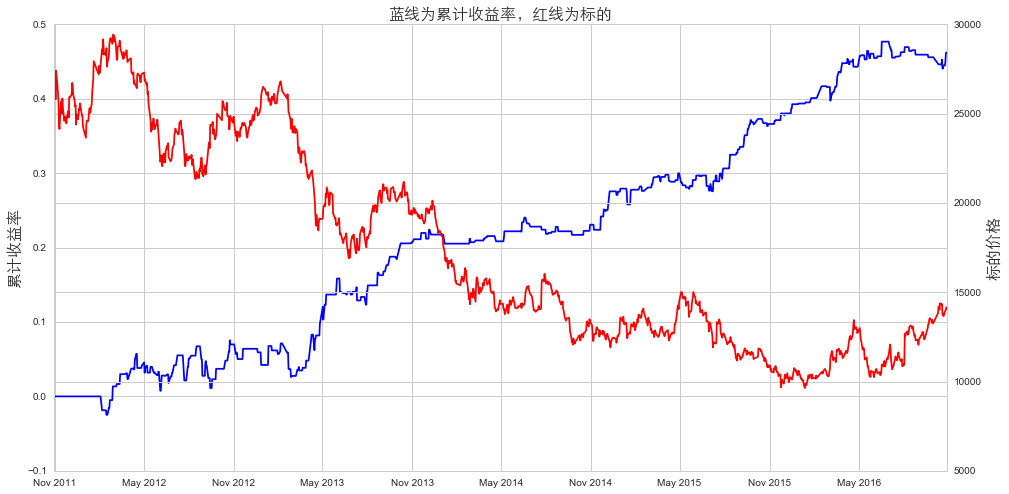

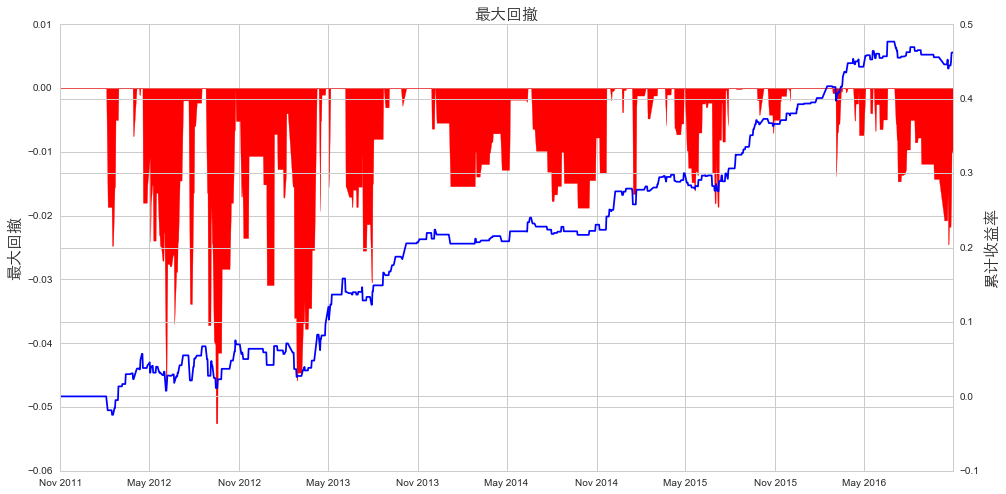

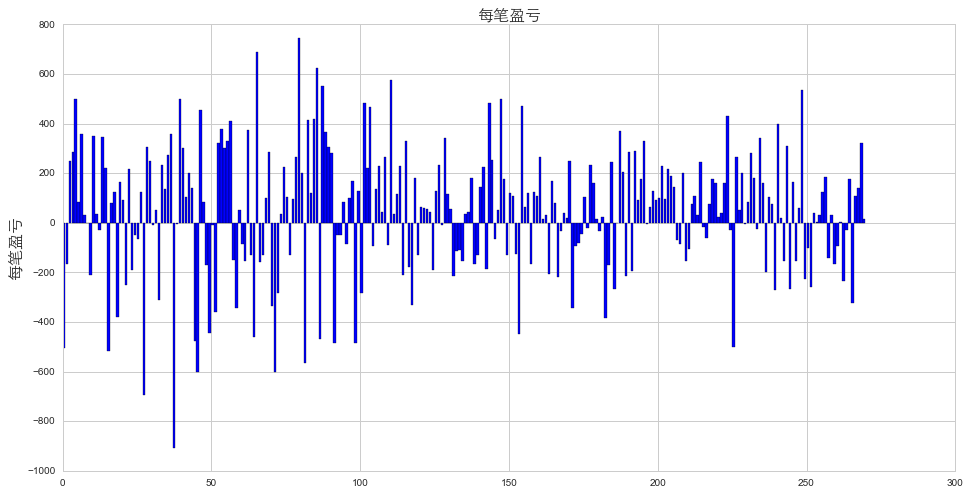

In [9]:
ploter(Accountsummny)

#### 参数优化

In [21]:
all_pf = pd.DataFrame()
for i in 0.01*np.arange(1,100):
    Accountsummny = runstrategy('../../ts_data/day/RU.SHF.addopen.csv',i,0.06,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = 0.01*np.arange(1,100)

In [22]:
"""打印最优的5个参数"""
all_pf.T.sort(columns=u'年化收益率',ascending=0).head(5)

/Users/zhaoyong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,开始时间,结束时间,回测周期,年化收益率,平均每年收益,年化波动率,夏普率,最大回撤,最大回撤周期,Calmar比率,交易次数,盈亏比,胜率
0.05,2011/10/31,2016/10/28,1214,8.5005%,8.35%,6.24%,1.33819266262,5.14%,124,1.6545137822,275,1.61109810349,62.18%
0.12,2011/10/31,2016/10/28,1214,8.2384%,8.10%,6.12%,1.32478096998,5.25%,124,1.56801418688,256,1.64488854727,62.11%
0.06,2011/10/31,2016/10/28,1214,8.2073%,8.08%,6.26%,1.29190100216,5.25%,124,1.56208509192,270,1.59609895338,62.22%
0.07,2011/10/31,2016/10/28,1214,8.0624%,7.95%,6.26%,1.27055355743,5.25%,124,1.53451015928,269,1.58396764986,62.08%
0.08,2011/10/31,2016/10/28,1214,8.0596%,7.95%,6.26%,1.27012842155,5.25%,124,1.53396806167,268,1.58372978116,61.94%


####  然后我们用最优的两个参数来画图

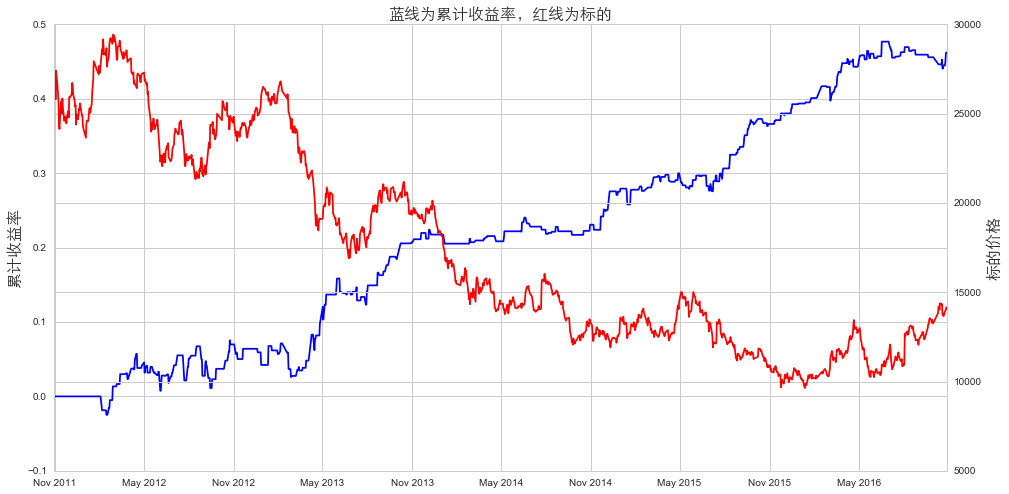

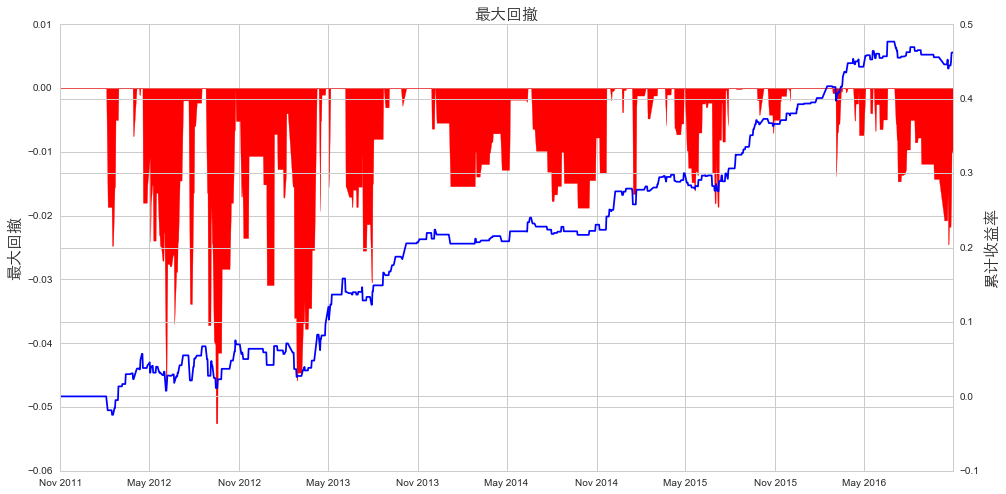

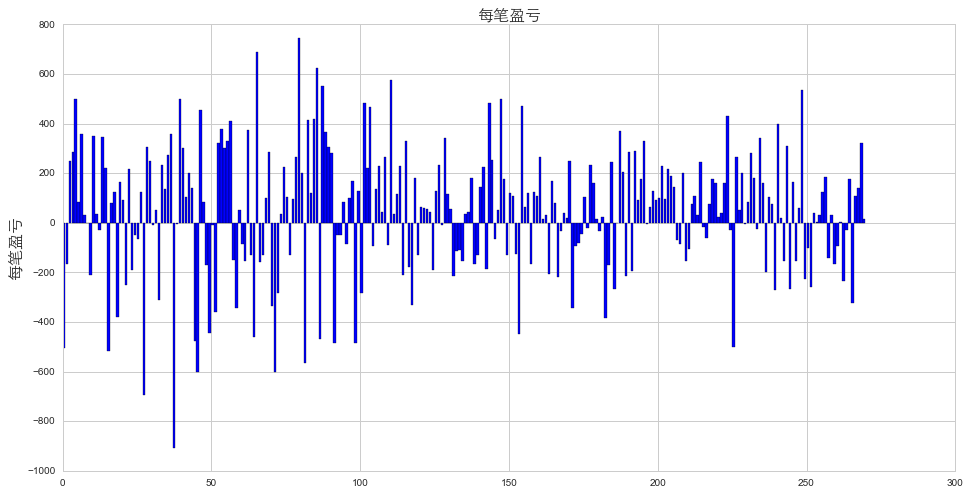

In [8]:
"""加载daytest"""
from bog_daytest import *
from perforanalyze import *

Accountsummny = runstrategy('../../ts_data/day/RU.SHF.addopen.csv',0.06,0.06,60)
pf,Pnl = stratanalyz(Accountsummny)
ploter(Accountsummny)

In [9]:
Accountsummny[Accountsummny['Openorder'] != 0]

,Close,Pos,Account,AccountCum,Openorder,Closeorder
date,,,,,,
2012/2/6,28605,-1,-505,26600,"{u'Vol': 1, u'Openpos': 28100, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28605, u'Type': 1, u'..."
2012/2/15,28665,-1,-165,26435,"{u'Vol': 1, u'Openpos': 28500, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28665, u'Type': 1, u'..."
2012/2/20,28230,-1,250,26685,"{u'Vol': 1, u'Openpos': 28480, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28230, u'Type': 1, u'..."
2012/2/22,29100,-1,285,26970,"{u'Vol': 1, u'Openpos': 29385, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 29100, u'Type': 1, u'..."
2012/2/28,29315,1,500,27470,"{u'Vol': 1, u'Openpos': 28815, u'Type': 1, u'T...","{u'Vol': 1, u'Closepos': 29315, u'Type': -1, u..."
2012/3/7,28085,1,85,27555,"{u'Vol': 1, u'Openpos': 28000, u'Type': 1, u'T...","{u'Vol': 1, u'Closepos': 28085, u'Type': -1, u..."
2012/3/14,28875,-1,360,27915,"{u'Vol': 1, u'Openpos': 29235, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28875, u'Type': 1, u'..."
2012/3/26,28300,-1,30,27945,"{u'Vol': 1, u'Openpos': 28330, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28300, u'Type': 1, u'..."
2012/3/27,28550,-1,-0,27945,"{u'Vol': 1, u'Openpos': 28550, u'Type': -1, u'...","{u'Vol': 1, u'Closepos': 28550, u'Type': 1, u'..."


#### 再来看塑料上的表现

In [5]:
"""加载bog_nightopen_test"""
from bog_nightopen_test import *
from perforanalyze import *
all_pf = pd.DataFrame()
for i in 0.01*np.arange(1,100):
    Accountsummny = runstrategy('../../ts_data/day/L.DCE.DAY.csv',0.21,i,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = 0.01*np.arange(1,100)

In [6]:
"""打印最优的5个参数"""
all_pf.T.sort(columns=u'年化收益率',ascending=0).head(5)

/Users/zhaoyong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,开始时间,结束时间,回测周期,年化收益率,平均每年收益,年化波动率,夏普率,最大回撤,最大回撤周期,Calmar比率,交易次数,盈亏比,胜率
0.07,2011/10/31,2016/10/28,1214,6.8392%,6.92%,7.74%,0.893077084104,11.70%,767,0.584519220856,201,1.43023970498,60.70%
0.09,2011/10/31,2016/10/28,1214,6.7439%,6.82%,7.71%,0.885151508527,11.70%,767,0.576376850261,198,1.42715437074,61.11%
0.08,2011/10/31,2016/10/28,1214,6.6222%,6.71%,7.74%,0.867370469332,11.70%,767,0.565973544672,200,1.41487400123,60.50%
0.10,2011/10/31,2016/10/28,1214,6.6048%,6.69%,7.69%,0.86982924696,11.70%,763,0.56448365127,196,1.41905354919,61.22%
0.12,2011/10/31,2016/10/28,1214,6.3155%,6.41%,7.60%,0.843780904244,11.70%,763,0.539765058256,189,1.4089456869,60.85%


/Users/zhaoyong/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


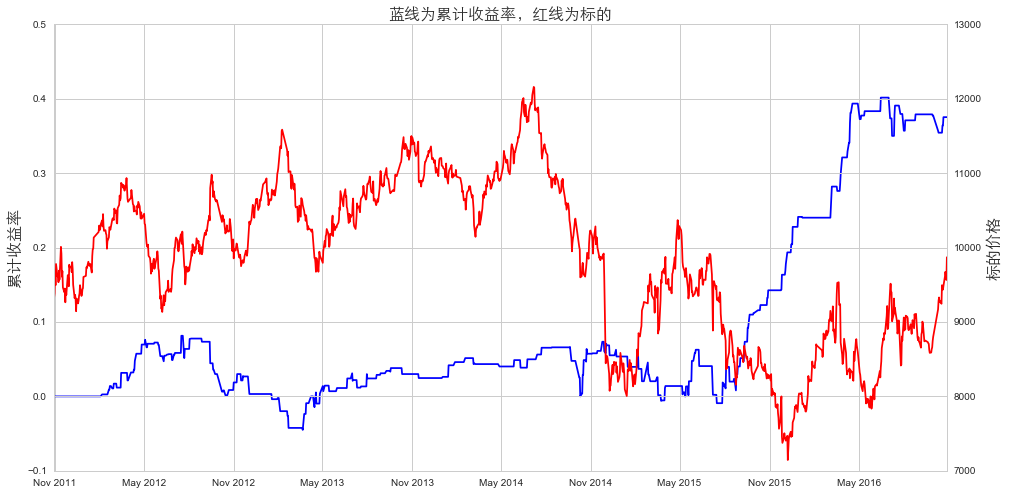

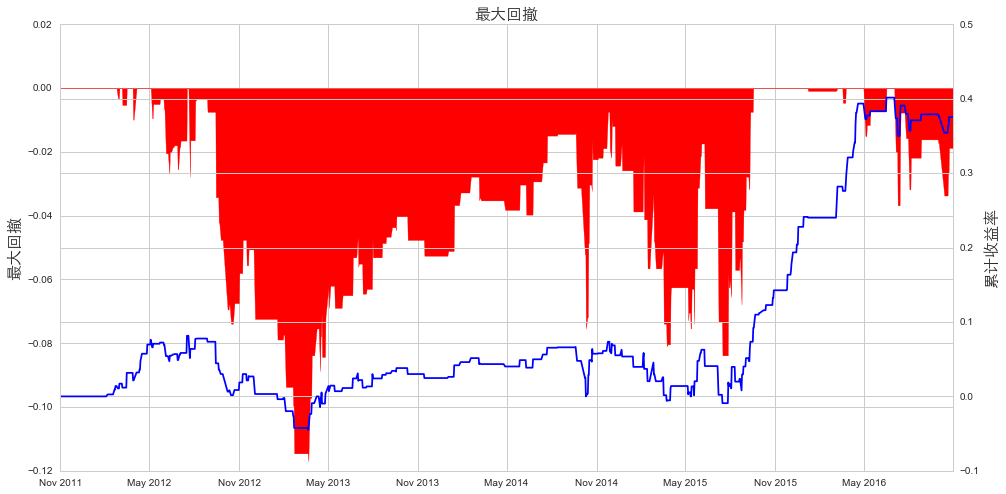

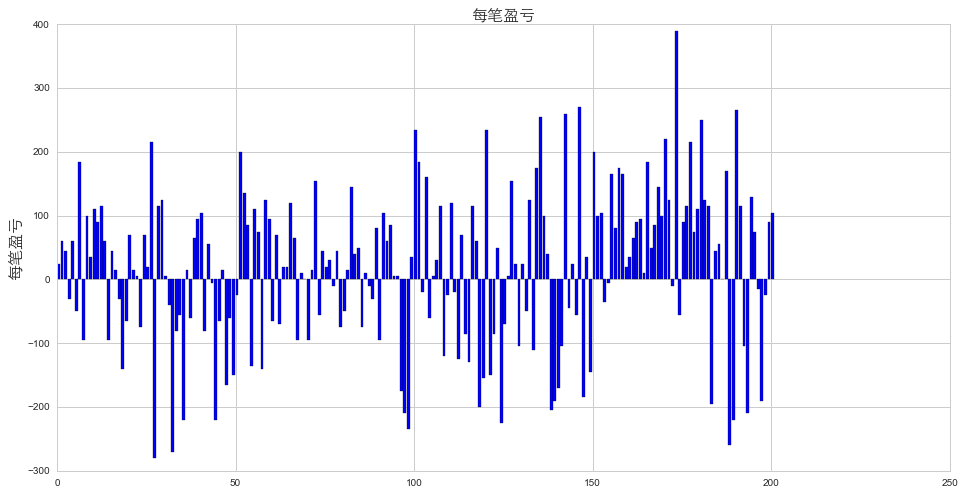

In [7]:
"""最优参数下表现"""
"""加载bog_nightopen_test"""
from bog_nightopen_test import *
from perforanalyze import *
Accountsummny = runstrategy('../../ts_data/day/L.DCE.DAY.csv',0.21,0.07,60)
pf,Pnl = stratanalyz(Accountsummny)
ploter(Accountsummny)

## 4. 综合夜盘和早盘两个信号，然后在早盘下单

In [25]:
"""加载bog_daytest_2con"""

from bog_daytest_2con import *
from perforanalyze import *
all_pf = pd.DataFrame()
for sym in symlist[1:]:
    Accountsummny = runstrategy('../../ts_data/day/'+sym+'.addopen.csv',0.06,0.06,60)
    pf,Pnl = stratanalyz(Accountsummny)
    all_pf = pd.concat([all_pf, pf[1]],axis=1)
all_pf.index = pf[0]
all_pf.columns = symlist[1:]

In [26]:
all_pf

,AU.SHF,CF.CZC,CU.SHF,J.DCE,P.DCE,RB.SHF,RU.SHF,SR.CZC,M.DCE
0,,,,,,,,,
开始时间,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31,2011/10/31
结束时间,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28,2016/10/28
回测周期,1214,1214,1214,1214,1214,1214,1214,1214,1214
年化收益率,-2.7274%,-2.5783%,-0.2904%,-0.4217%,-6.8711%,-3.0243%,7.1419%,2.2784%,-7.4819%
平均每年收益,-2.71%,-2.53%,-0.18%,-0.24%,-6.90%,-2.93%,7.08%,2.34%,-7.33%
年化波动率,3.38%,3.99%,4.62%,5.99%,6.66%,5.28%,5.94%,4.08%,9.47%
夏普率,-0.801152060215,-0.63493802323,-0.039781195385,-0.040533528446,-1.03510014694,-0.555098229408,1.19205942115,0.572913304269,-0.773654440244
最大回撤,13.88%,12.17%,7.70%,14.65%,32.38%,19.88%,5.25%,6.09%,32.93%
最大回撤周期,1131,1151,1081,1079,1136,1089,132,318,1151
